# Notebooks:
## MSID dataset reading 
https://www.kaggle.com/code/mayarelghandour/monkeypox-1

## MSLD dataset reading 
https://www.kaggle.com/code/faridamgamil/msldv2

## Merging and the removal of duplicates monkeypox_
https://www.kaggle.com/code/mayarelghandour/monkeypox-2

## Preprocessing and augmentation 
https://www.kaggle.com/code/mayarelghandour/monkeypox-preprocessing

## Feature extraction 
https://www.kaggle.com/code/mayarelghandour/fork-of-mpox-feature-extraction

https://www.kaggle.com/code/mayarelghandour/feature-extraction


## Feature selection and model
https://www.kaggle.com/code/faridamgamil/feature-selectionmin

https://www.kaggle.com/code/mayarelghandour/feature-selection   current one

In [2]:
pip install skrebate

  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=57953033375cd0c54836a0563516ec92aa8caaee270f6c03c1a1038aa9ecfda2
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built skrebate
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from skrebate import ReliefF
from sklearn.feature_selection import mutual_info_classif
import cv2
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

ALL FEATURE without clahe

In [4]:
glcm_wave=pd.read_csv("/kaggle/input/features-of-mpox/glcm_wave.csv")
sift=pd.read_csv("/kaggle/input/features-of-mpox/sift_df.csv")
orb=pd.read_csv("/kaggle/input/features-of-mpox/orb_df.csv")
brief=pd.read_csv("/kaggle/input/features-of-mpox/brief_df.csv")
wavelet=pd.read_csv("/kaggle/input/features-of-mpox/wavelet_df.csv")
glcm=pd.read_csv("/kaggle/input/features-of-mpox/GLCM.csv")
glszm=pd.read_csv("/kaggle/input/features-of-mpox/GLSZM.csv")
glrlm=pd.read_csv("/kaggle/input/features-of-mpox/GLRLM.csv")

In [5]:
glcm=glcm.drop(columns=["Image"],axis=1)

In [ ]:
glszm=glszm.drop(columns=["Image"],axis=1)

In [9]:
glrlm=glrlm.drop(columns=["Image"],axis=1)

In [10]:
allfeat=pd.DataFrame()
merged_df = pd.merge(glcm_wave,sift , on=["paths", "type","labels"])
merged_df = pd.merge(merged_df, orb, on=["paths", "type","labels"])
merged_df = pd.merge(merged_df, brief, on=["paths", "type","labels"])
merged_df = pd.merge(merged_df, wavelet, on=["paths", "type","labels"])
merged_df = pd.merge(merged_df, glcm, on=["paths", "type","labels"])
merged_df = pd.merge(merged_df, glszm, on=["paths", "type","labels"])
merged_df = pd.merge(merged_df, glrlm, on=["paths", "type","labels"])

allfeat=merged_df

In [26]:
merged_df["paths"]

0       /kaggle/input/mpox-skin-lesion-dataset-version...
1       /kaggle/input/monkeypoxskinimagedataset/Monkey...
2       /kaggle/input/monkeypoxskinimagedataset/Monkey...
3       /kaggle/input/monkeypoxskinimagedataset/Monkey...
4       /kaggle/input/mpox-skin-lesion-dataset-version...
                              ...                        
7267    /kaggle/input/monkeypoxskinimagedataset/Monkey...
7268    /kaggle/input/monkeypoxskinimagedataset/Monkey...
7269    /kaggle/input/monkeypoxskinimagedataset/Monkey...
7270    /kaggle/input/monkeypoxskinimagedataset/Monkey...
7271    /kaggle/input/mpox-skin-lesion-dataset-version...
Name: paths, Length: 7272, dtype: object

In [11]:
allfeat.reset_index(inplace=True)

In [12]:
allfeat.reset_index(inplace=True)
allfeat=allfeat.drop(columns=["index","level_0"],axis=1)
allfeat

,ca_contrast,ca_dissimilarity,ca_homogeneity,ca_energy,ca_correlation,ca_ASM,ch_contrast,ch_dissimilarity,ch_homogeneity,ch_energy,...,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis
0,2211.651464,19.770512,0.122329,0.013134,0.712155,0.000172,13192.298343,53.544482,0.434468,0.208513,...,9.184995,0.125864,5.724000,499.190961,0.131543,0.173610,62.929779,0.314027,4.696284,0.045447
1,552.575048,8.192165,0.183343,0.018207,0.866274,0.000331,15600.156129,62.751528,0.419368,0.205922,...,2.713695,0.117017,4.921261,349.895817,0.227007,0.334854,9.990541,0.461357,9.432564,0.046601
2,1573.811856,14.067970,0.525279,0.120435,0.545436,0.014504,7178.245495,29.869208,0.720719,0.627462,...,11.093109,0.241151,4.660615,957.829849,0.302855,0.358776,16.654523,0.564071,6.873576,0.116075
3,2654.275177,23.490428,0.110205,0.011588,0.766996,0.000134,13243.147281,53.801239,0.468639,0.267548,...,7.723739,0.071703,5.994187,722.563687,0.142178,0.167230,77.228136,0.365254,10.735066,0.022746
4,2518.704553,20.294482,0.190421,0.025593,0.718073,0.000655,5089.931226,21.249920,0.775472,0.669860,...,6.594006,0.122549,5.672468,688.749096,0.186178,0.193630,69.725539,0.431743,8.328994,0.059468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7267,2288.322313,18.121863,0.140653,0.015576,0.668101,0.000243,19732.686293,78.612613,0.447318,0.290940,...,2.977947,0.046275,5.236814,648.543081,0.169518,0.250000,36.280879,0.393019,13.210472,0.015678
7268,1912.783945,17.855856,0.429182,0.359505,0.852945,0.129244,9073.215010,37.714849,0.631596,0.511384,...,1.784921,0.102623,5.182642,1619.402470,0.270400,0.352760,12.382968,0.523414,12.430148,0.053565
7269,3269.032979,24.106982,0.172020,0.021503,0.751741,0.000462,13959.507963,56.393742,0.549140,0.379880,...,7.674411,0.056426,5.746517,966.096755,0.174591,0.173542,76.402386,0.419759,14.043806,0.019336
7270,718.508768,7.888111,0.269491,0.036715,0.717055,0.001348,9199.149292,36.884974,0.706187,0.560749,...,77.626687,0.260268,4.156017,150.432851,0.294535,0.232912,62.803903,0.542382,5.844539,0.080479


In [13]:
mapping={'CWP':0, 'HFMD':1, 'chpox':2, 'measles':3, 'mpox':4, 'normal':5}
allfeat["labels"]=allfeat["labels"].map(mapping)

In [14]:
train_df = allfeat.loc[allfeat['type'] == 'train']
test_df = allfeat.loc[allfeat['type'] == 'test']


In [15]:
X = allfeat.drop(columns=['labels', 'paths'])

y = allfeat[['labels', 'type']]

X_train = X[X['type'] == 'train'].drop(columns=['type'])
X_test = X[X['type'] == 'test'].drop(columns=['type'])
y_train = y[y['type'] == 'train'].drop(columns=['type'])
y_test = y[y['type'] == 'test'].drop(columns=['type'])



Accuracy: 0.7147766323024055


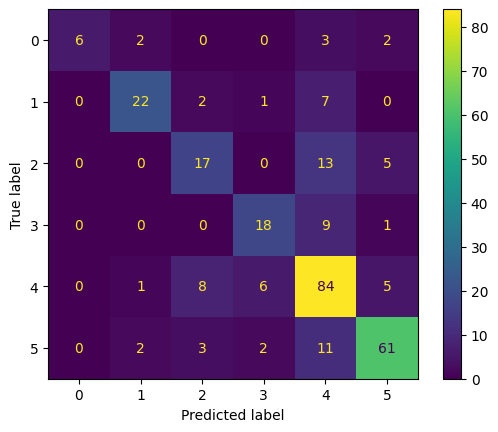

In [20]:
model = XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

class_names = np.unique(y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

plt.show()

balanced

In [20]:
allfeat[allfeat["type"]=="train"]["labels"].value_counts()

labels
2    1526
1    1396
4    1241
3    1198
5     936
0     684
Name: count, dtype: int64

In [21]:
balanced=allfeat[allfeat["type"]=="train"].groupby("labels").head(684)
balanced

,ca_contrast,ca_dissimilarity,ca_homogeneity,ca_energy,ca_correlation,ca_ASM,ch_contrast,ch_dissimilarity,ch_homogeneity,ch_energy,...,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis
0,2211.651464,19.770512,0.122329,0.013134,0.712155,0.000172,13192.298343,53.544482,0.434468,0.208513,...,9.184995,0.125864,5.724000,499.190961,0.131543,0.173610,62.929779,0.314027,4.696284,0.045447
1,552.575048,8.192165,0.183343,0.018207,0.866274,0.000331,15600.156129,62.751528,0.419368,0.205922,...,2.713695,0.117017,4.921261,349.895817,0.227007,0.334854,9.990541,0.461357,9.432564,0.046601
2,1573.811856,14.067970,0.525279,0.120435,0.545436,0.014504,7178.245495,29.869208,0.720719,0.627462,...,11.093109,0.241151,4.660615,957.829849,0.302855,0.358776,16.654523,0.564071,6.873576,0.116075
3,2654.275177,23.490428,0.110205,0.011588,0.766996,0.000134,13243.147281,53.801239,0.468639,0.267548,...,7.723739,0.071703,5.994187,722.563687,0.142178,0.167230,77.228136,0.365254,10.735066,0.022746
4,2518.704553,20.294482,0.190421,0.025593,0.718073,0.000655,5089.931226,21.249920,0.775472,0.669860,...,6.594006,0.122549,5.672468,688.749096,0.186178,0.193630,69.725539,0.431743,8.328994,0.059468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6724,800.567648,8.995254,0.727663,0.485700,0.970220,0.235904,5517.593871,24.256998,0.798435,0.761800,...,4402.581707,0.702419,6.814936,17.937346,0.043286,0.023308,2353.978574,0.201852,3.637312,0.022435
6725,2214.607867,16.570866,0.451717,0.361257,0.864387,0.130507,6636.501207,27.293195,0.761710,0.652073,...,2254.586774,0.445170,5.532909,127.095120,0.114877,0.046731,1626.686347,0.324978,3.757720,0.052662
6726,2342.416988,20.910393,0.204246,0.103706,0.785388,0.010755,13806.526303,57.898246,0.432401,0.230703,...,173.347826,0.207559,4.929138,544.499554,0.249569,0.172007,153.681077,0.510483,8.041967,0.053433
6727,1805.626046,14.095319,0.512877,0.360469,0.917762,0.129938,8765.759894,37.398568,0.640533,0.530836,...,800.174123,0.293674,5.223003,582.834505,0.241378,0.087627,676.063310,0.507688,7.911925,0.056659


In [22]:
X_train = balanced[balanced['type'] == 'train'].drop(columns=['type','paths','labels'])
X_test = allfeat[allfeat['type'] == 'test'].drop(columns=['type','paths','labels'])
y_train = balanced[balanced['type'] == 'train']["labels"]
y_test = allfeat[allfeat['type'] == 'test']["labels"]

Accuracy: 0.7216494845360825


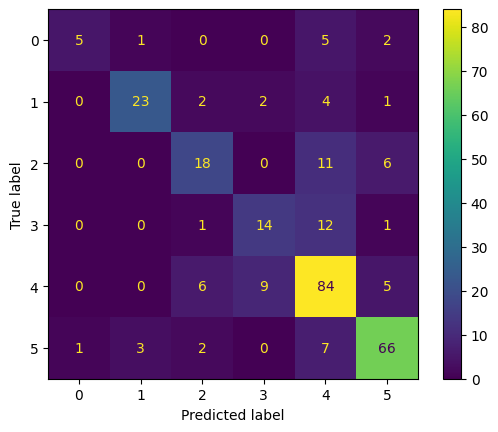

In [24]:
model = XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

class_names = np.unique(y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

# Show the plot
plt.show()

binary

In [26]:
MSD_pd = pd.get_dummies(allfeat, columns=['labels'], drop_first=False, dtype=int)
print(f"One-Hot Encoded Data using Pandas:\n")
MSD_pd

One-Hot Encoded Data using Pandas:



,ca_contrast,ca_dissimilarity,ca_homogeneity,ca_energy,ca_correlation,ca_ASM,ch_contrast,ch_dissimilarity,ch_homogeneity,ch_energy,...,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,labels_0,labels_1,labels_2,labels_3,labels_4,labels_5
0,2211.651464,19.770512,0.122329,0.013134,0.712155,0.000172,13192.298343,53.544482,0.434468,0.208513,...,62.929779,0.314027,4.696284,0.045447,0,1,0,0,0,0
1,552.575048,8.192165,0.183343,0.018207,0.866274,0.000331,15600.156129,62.751528,0.419368,0.205922,...,9.990541,0.461357,9.432564,0.046601,0,0,1,0,0,0
2,1573.811856,14.067970,0.525279,0.120435,0.545436,0.014504,7178.245495,29.869208,0.720719,0.627462,...,16.654523,0.564071,6.873576,0.116075,0,0,0,0,0,1
3,2654.275177,23.490428,0.110205,0.011588,0.766996,0.000134,13243.147281,53.801239,0.468639,0.267548,...,77.228136,0.365254,10.735066,0.022746,0,0,1,0,0,0
4,2518.704553,20.294482,0.190421,0.025593,0.718073,0.000655,5089.931226,21.249920,0.775472,0.669860,...,69.725539,0.431743,8.328994,0.059468,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7267,2288.322313,18.121863,0.140653,0.015576,0.668101,0.000243,19732.686293,78.612613,0.447318,0.290940,...,36.280879,0.393019,13.210472,0.015678,0,0,1,0,0,0
7268,1912.783945,17.855856,0.429182,0.359505,0.852945,0.129244,9073.215010,37.714849,0.631596,0.511384,...,12.382968,0.523414,12.430148,0.053565,0,0,0,0,0,1
7269,3269.032979,24.106982,0.172020,0.021503,0.751741,0.000462,13959.507963,56.393742,0.549140,0.379880,...,76.402386,0.419759,14.043806,0.019336,0,0,0,0,0,1
7270,718.508768,7.888111,0.269491,0.036715,0.717055,0.001348,9199.149292,36.884974,0.706187,0.560749,...,62.803903,0.542382,5.844539,0.080479,0,0,1,0,0,0


In [33]:
MSD_pd[MSD_pd["type"]=="train"]["labels_4"].value_counts()

labels_4
0    5740
1    1241
Name: count, dtype: int64

In [30]:
X_train=MSD_pd[MSD_pd["type"]=="train"].drop(columns=['type','paths','labels_0','labels_1','labels_2','labels_3','labels_4','labels_5'])
X_test=MSD_pd[MSD_pd["type"]=="test"].drop(columns=['type','paths','labels_0','labels_1','labels_2','labels_3','labels_4','labels_5'])
y_train=MSD_pd[MSD_pd["type"]=="train"]["labels_4"]
y_test=MSD_pd[MSD_pd["type"]=="test"]["labels_4"]


Accuracy: 0.8178694158075601


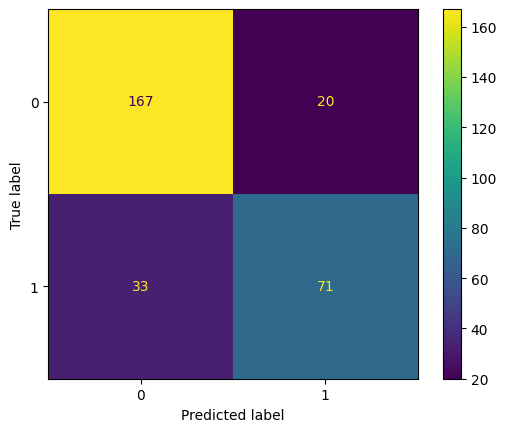

In [31]:
model = XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

class_names = np.unique(y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

# Show the plot
plt.show()

balanced

In [35]:
MSDx=MSD_pd[MSD_pd["type"]=="train"].groupby("labels_4").head(1241)

In [36]:
X_train=MSDx[MSDx["type"]=="train"].drop(columns=['type','paths','labels_0','labels_1','labels_2','labels_3','labels_4','labels_5'])
X_test=MSD_pd[MSD_pd["type"]=="test"].drop(columns=['type','paths','labels_0','labels_1','labels_2','labels_3','labels_4','labels_5'])
y_train=MSDx[MSDx["type"]=="train"]["labels_4"]
y_test=MSD_pd[MSD_pd["type"]=="test"]["labels_4"]


Accuracy: 0.7972508591065293


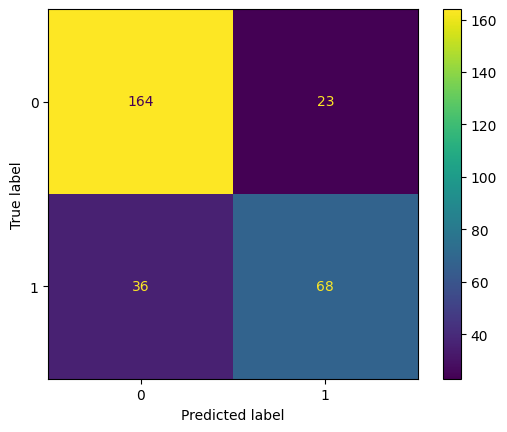

In [37]:
model = XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

class_names = np.unique(y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

# Show the plot
plt.show()

using filter method 

In [38]:
X = allfeat.drop(columns=['labels', 'paths'])

y = allfeat[['labels', 'type']]

In [68]:
X=X.drop("type",axis=1)
y=y.drop("type",axis=1)
relief = ReliefF(n_neighbors=5, n_features_to_select=100,verbose=1)
relief.fit(X.values, y["labels"])

relief_scores = relief.feature_importances_

relief_score_df = pd.DataFrame({'Feature': X.columns, 'Relief Score': relief_scores})
print(relief_score_df)


Created distance array in 2.660388231277466 seconds.
Feature scoring under way ...


KeyboardInterrupt: 

In [41]:
relief_score_df["Relief Score"].max()

0.0

In [46]:
info_gain = mutual_info_classif(X, y) 
info_gain_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gain})

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
info_gain_df['Information Gain'].max()

0.2882144270322202

In [49]:
info_gain_df['Information Gain'].min()

0.0

In [53]:
info_gain_df.sort_values(by='Information Gain', ascending=False).head(200)

,Feature,Information Gain
221,original_glszm_LargeAreaLowGrayLevelEmphasis,0.288214
193,Kurtosis_cH,0.288204
242,original_glrlm_RunPercentage,0.287143
184,Skew_cA,0.281575
233,original_glrlm_GrayLevelVariance,0.280610
...,...,...
152,brief3,0.016228
77,orb13,0.016138
171,brief22,0.015745
39,sift15,0.015475


In [55]:
info_gain_df[info_gain_df['Information Gain']>0.1]

,Feature,Information Gain
0,ca_contrast,0.225383
1,ca_dissimilarity,0.236495
2,ca_homogeneity,0.253739
3,ca_energy,0.268198
4,ca_correlation,0.256707
...,...,...
242,original_glrlm_RunPercentage,0.287143
243,original_glrlm_RunVariance,0.271154
244,original_glrlm_ShortRunEmphasis,0.255135
245,original_glrlm_ShortRunHighGrayLevelEmphasis,0.263908


In [67]:
info_gain_df.to_csv("ig.csv",index=False)

feature selected

In [70]:

allfeatN=allfeat[info_gain_df[info_gain_df['Information Gain']>0.1]["Feature"]]
allfeatN["labels"]=allfeat["labels"]
allfeatN["type"]=allfeat["type"]

<ipython-input-70-c3d5b8cc8d5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allfeatN["labels"]=allfeat["labels"]
<ipython-input-70-c3d5b8cc8d5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allfeatN["type"]=allfeat["type"]


In [71]:
allfeatN

,ca_contrast,ca_dissimilarity,ca_homogeneity,ca_energy,ca_correlation,ca_ASM,ch_contrast,ch_dissimilarity,ch_homogeneity,ch_energy,...,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,labels,type
0,2211.651464,19.770512,0.122329,0.013134,0.712155,0.000172,13192.298343,53.544482,0.434468,0.208513,...,5.724000,499.190961,0.131543,0.173610,62.929779,0.314027,4.696284,0.045447,1,train
1,552.575048,8.192165,0.183343,0.018207,0.866274,0.000331,15600.156129,62.751528,0.419368,0.205922,...,4.921261,349.895817,0.227007,0.334854,9.990541,0.461357,9.432564,0.046601,2,train
2,1573.811856,14.067970,0.525279,0.120435,0.545436,0.014504,7178.245495,29.869208,0.720719,0.627462,...,4.660615,957.829849,0.302855,0.358776,16.654523,0.564071,6.873576,0.116075,5,train
3,2654.275177,23.490428,0.110205,0.011588,0.766996,0.000134,13243.147281,53.801239,0.468639,0.267548,...,5.994187,722.563687,0.142178,0.167230,77.228136,0.365254,10.735066,0.022746,2,train
4,2518.704553,20.294482,0.190421,0.025593,0.718073,0.000655,5089.931226,21.249920,0.775472,0.669860,...,5.672468,688.749096,0.186178,0.193630,69.725539,0.431743,8.328994,0.059468,5,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7267,2288.322313,18.121863,0.140653,0.015576,0.668101,0.000243,19732.686293,78.612613,0.447318,0.290940,...,5.236814,648.543081,0.169518,0.250000,36.280879,0.393019,13.210472,0.015678,2,test
7268,1912.783945,17.855856,0.429182,0.359505,0.852945,0.129244,9073.215010,37.714849,0.631596,0.511384,...,5.182642,1619.402470,0.270400,0.352760,12.382968,0.523414,12.430148,0.053565,5,test
7269,3269.032979,24.106982,0.172020,0.021503,0.751741,0.000462,13959.507963,56.393742,0.549140,0.379880,...,5.746517,966.096755,0.174591,0.173542,76.402386,0.419759,14.043806,0.019336,5,test
7270,718.508768,7.888111,0.269491,0.036715,0.717055,0.001348,9199.149292,36.884974,0.706187,0.560749,...,4.156017,150.432851,0.294535,0.232912,62.803903,0.542382,5.844539,0.080479,2,test


In [72]:
X = allfeatN.drop(columns=['labels'])

y = allfeatN[['labels', 'type']]

X_train = X[X['type'] == 'train'].drop(columns=['type'])
X_test = X[X['type'] == 'test'].drop(columns=['type'])
y_train = y[y['type'] == 'train'].drop(columns=['type'])
y_test = y[y['type'] == 'test'].drop(columns=['type'])


Accuracy: 0.7010309278350515


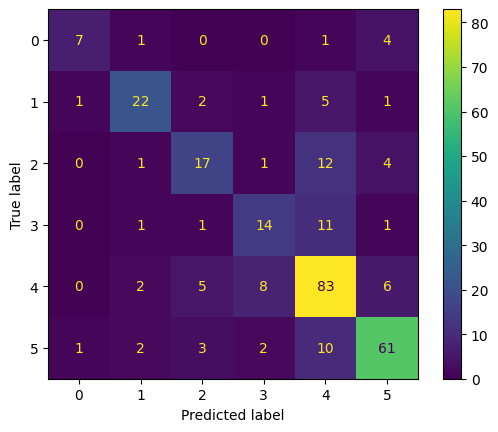

In [66]:
model = XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

class_names = np.unique(y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

# Show the plot
plt.show()

In [ ]:
bakward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                                    k_features='best',
                                                    forward=False,
                                                    floating=True,
                                                    verbose=2,
                                                    scoring= "accuracy",
                                                    cv= 5).fit(X_train, np.ravel(y_train))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  5.4min

[2024-12-23 07:39:57] Features: 84/1 -- score: 0.753208779353219[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  5.4min

[2024-12-23 07:51:12] Features: 83/1 -- score: 0.755500940410581[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  5.4min

[2024-12-23 08:02:38] Features: 82/1 -- score: 0.7544973572103955[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  5.4min

[2024-12-23 08:14:06] Features: 81/1 -- score: 0.7532084716943593[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  4.9min

[2024-12-23 08:24:56] Features: 81/1 -- score: 0.7573624816173832[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  4.9min


modified data

In [14]:
sift2=pd.read_csv("/kaggle/input/features-of-mpox/siftENCH.csv")
orb2=pd.read_csv("/kaggle/input/features-of-mpox/orbENCH.csv")
brief2=pd.read_csv("/kaggle/input/features-of-mpox/briefENCH.csv")
wavelet2=pd.read_csv("/kaggle/input/features-of-mpox/waveletENCH.csv")


In [15]:
allfeat2=pd.DataFrame()
merged_df = pd.merge(glcm_wave,sift2 , on=["paths", "type","labels"])
merged_df = pd.merge(merged_df, orb2, on=["paths", "type","labels"])
merged_df = pd.merge(merged_df, brief2, on=["paths", "type","labels"])
merged_df = pd.merge(merged_df, wavelet2, on=["paths", "type","labels"])
merged_df = pd.merge(merged_df, glcm, on=["paths", "type","labels"])
merged_df = pd.merge(merged_df, glszm, on=["paths", "type","labels"])
merged_df = pd.merge(merged_df, glrlm, on=["paths", "type","labels"])

allfeat2=merged_df

In [16]:
allfeat2.reset_index(inplace=True)
allfeat2=allfeat2.drop("index",axis=1)
allfeat2

,ca_contrast,ca_dissimilarity,ca_homogeneity,ca_energy,ca_correlation,ca_ASM,ch_contrast,ch_dissimilarity,ch_homogeneity,ch_energy,...,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis
0,2211.651464,19.770512,0.122329,0.013134,0.712155,0.000172,13192.298343,53.544482,0.434468,0.208513,...,9.184995,0.125864,5.724000,499.190961,0.131543,0.173610,62.929779,0.314027,4.696284,0.045447
1,552.575048,8.192165,0.183343,0.018207,0.866274,0.000331,15600.156129,62.751528,0.419368,0.205922,...,2.713695,0.117017,4.921261,349.895817,0.227007,0.334854,9.990541,0.461357,9.432564,0.046601
2,1573.811856,14.067970,0.525279,0.120435,0.545436,0.014504,7178.245495,29.869208,0.720719,0.627462,...,11.093109,0.241151,4.660615,957.829849,0.302855,0.358776,16.654523,0.564071,6.873576,0.116075
3,2654.275177,23.490428,0.110205,0.011588,0.766996,0.000134,13243.147281,53.801239,0.468639,0.267548,...,7.723739,0.071703,5.994187,722.563687,0.142178,0.167230,77.228136,0.365254,10.735066,0.022746
4,2518.704553,20.294482,0.190421,0.025593,0.718073,0.000655,5089.931226,21.249920,0.775472,0.669860,...,6.594006,0.122549,5.672468,688.749096,0.186178,0.193630,69.725539,0.431743,8.328994,0.059468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7267,2288.322313,18.121863,0.140653,0.015576,0.668101,0.000243,19732.686293,78.612613,0.447318,0.290940,...,2.977947,0.046275,5.236814,648.543081,0.169518,0.250000,36.280879,0.393019,13.210472,0.015678
7268,1912.783945,17.855856,0.429182,0.359505,0.852945,0.129244,9073.215010,37.714849,0.631596,0.511384,...,1.784921,0.102623,5.182642,1619.402470,0.270400,0.352760,12.382968,0.523414,12.430148,0.053565
7269,3269.032979,24.106982,0.172020,0.021503,0.751741,0.000462,13959.507963,56.393742,0.549140,0.379880,...,7.674411,0.056426,5.746517,966.096755,0.174591,0.173542,76.402386,0.419759,14.043806,0.019336
7270,718.508768,7.888111,0.269491,0.036715,0.717055,0.001348,9199.149292,36.884974,0.706187,0.560749,...,77.626687,0.260268,4.156017,150.432851,0.294535,0.232912,62.803903,0.542382,5.844539,0.080479


In [17]:
mapping={'CWP':0, 'HFMD':1, 'chpox':2, 'measles':3, 'mpox':4, 'normal':5}
allfeat2["labels"]=allfeat2["labels"].map(mapping)

In [18]:
train_df = allfeat2.loc[allfeat2['type'] == 'train']
test_df = allfeat2[allfeat2['type'] == 'test']


In [19]:
X = allfeat2.drop(columns=['labels', 'paths'])

y = allfeat2[['labels', 'type']]

X_train = X[X['type'] == 'train'].drop(columns=['type'])
X_test = X[X['type'] == 'test'].drop(columns=['type'])
y_train = y[y['type'] == 'train'].drop(columns=['type'])
y_test = y[y['type'] == 'test'].drop(columns=['type'])



Accuracy: 0.6941580756013745


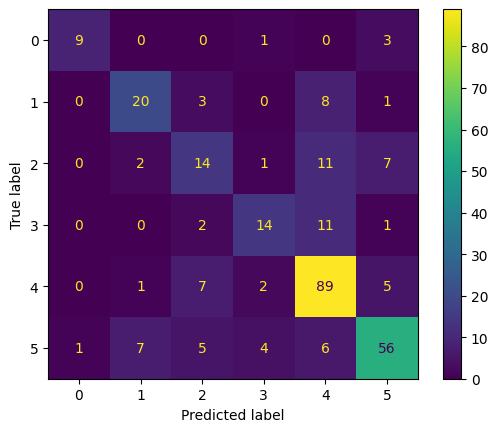

In [20]:
model2 = XGBClassifier()

model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

class_names = np.unique(y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

# Show the plot
plt.show()